# Lecture 3 notebook part 1: MNIST classifier

## Introduction to TensorFlow and Deep Learning

## IADS Summer School, 1st August 2022

### Dr Michael Fairbank, University of Essex, UK

- Email: m.fairbank@essex.ac.uk
- This is a Jupyter Notebook to accompany Lecture 3 of the course

# MNIST digits dataset

- First load and view the MNIST digits dataset
- There are 60000 images in this dataset, but we will only view the first 25 of them:


test_images shape (10000, 28, 28) train_images shape (60000, 28, 28)


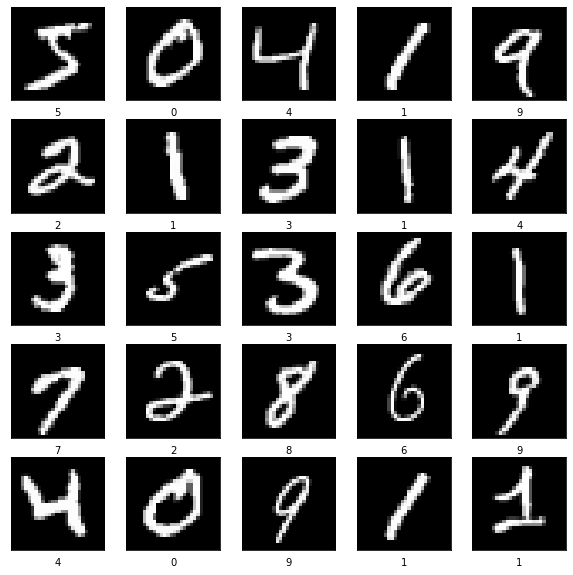

In [1]:
# Load and visualise the MNIST digits
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(train_images0, train_labels0),(test_images0, test_labels0) = mnist.load_data()

print("test_images shape",test_images0.shape,"train_images shape",train_images0.shape)
class_names=["0","1","2","3","4","5","6","7","8","9"]
import matplotlib.pyplot as plt
# plot first few images
plt.figure(figsize=(10,10))
for i in range(25):
    # define subplot
    plt.subplot(5,5,i+1)
    # plot raw pixel data
    plt.imshow(train_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Add a label underneath...
    plt.xlabel(class_names[train_labels0[i]])
plt.show()

### Next build a neural-network classifier for these digits.

- We will build a keras model, with the higher-level API concepts, taught in lecture 2

In [2]:
from tensorflow import keras
# Each MNIST images are 28*28.  Therefore if there are N images, then the 
# shape of the numpy array holding the images is N*28*28
# We will reshape that here to be N*784, using a numpy reshape.
# Note that this flattens each image into a single vector length 784.
test_images=test_images0.reshape(10000,784) # 10000 test patterns
train_images=train_images0.reshape(60000,784) # 60000 train patterns

# Also rescale greyscale from 8 bit to floating point (by dividing by 255)
test_images=test_images/255.0
train_images=train_images/255.0 

# Create the model
layer1=keras.layers.Dense(10, activation="softmax") # only input-output layer included in neural network
keras_model=keras.models.Sequential(layer1)
keras_model.build(input_shape=[None,784])


## View the keras model summary information

- This shows you how many layers your neural network has, and how many weights, etc.

In [3]:
# View the model summary information...
keras_model.summary()

# 7850 parameters because there are 784 inputs * 10 outputs = 7840 + 10 biases= 7850

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Train the Keras model

- We will use SGD optimiser (ordinary gradient descent)
- We will use Cross Entropy loss ("SparseCategoricalCrossentropy")
- We will run 200 training iterations (epochs)...

In [4]:
optimizer = tf.keras.optimizers.SGD(0.5)
keras_model.compile(
    optimizer=optimizer,  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
) 
# Train loop
history = keras_model.fit(
    train_images,
    train_labels0,
    batch_size=len(train_images),
    epochs=200, # iterations
    validation_data=(test_images, test_labels0),
)


Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2.4314 - sparse_categorical_accuracy: 0.1020 - val_loss: 1.9087 - val_sparse_categorical_accuracy: 0.4118
Epoch 2/200
1/1 [==============================] - 0s 123ms/step - loss: 1.9138 - sparse_categorical_accuracy: 0.4110 - val_loss: 1.5606 - val_sparse_categorical_accuracy: 0.6510
Epoch 3/200
1/1 [==============================] - 0s 127ms/step - loss: 1.5780 - sparse_categorical_accuracy: 0.6372 - val_loss: 1.3344 - val_sparse_categorical_accuracy: 0.6877
Epoch 4/200
1/1 [==============================] - 0s 125ms/step - loss: 1.3511 - sparse_categorical_accuracy: 0.6847 - val_loss: 1.1737 - val_sparse_categorical_accuracy: 0.7739
Epoch 5/200
1/1 [==============================] - 0s 122ms/step - loss: 1.1986 - sparse_categorical_accuracy: 0.7588 - val_loss: 1.0613 - val_sparse_categorical_accuracy: 0.7715
Epoch 6/200
1/1 [==============================] - 0s 128ms/step - loss: 1.0831 - sparse_categorical_accurac

1/1 [==============================] - 0s 154ms/step - loss: 0.4765 - sparse_categorical_accuracy: 0.8777 - val_loss: 0.4490 - val_sparse_categorical_accuracy: 0.8858
Epoch 47/200
1/1 [==============================] - 0s 138ms/step - loss: 0.4737 - sparse_categorical_accuracy: 0.8783 - val_loss: 0.4464 - val_sparse_categorical_accuracy: 0.8866
Epoch 48/200
1/1 [==============================] - 0s 127ms/step - loss: 0.4710 - sparse_categorical_accuracy: 0.8788 - val_loss: 0.4439 - val_sparse_categorical_accuracy: 0.8873
Epoch 49/200
1/1 [==============================] - 0s 117ms/step - loss: 0.4684 - sparse_categorical_accuracy: 0.8792 - val_loss: 0.4415 - val_sparse_categorical_accuracy: 0.8882
Epoch 50/200
1/1 [==============================] - 0s 123ms/step - loss: 0.4659 - sparse_categorical_accuracy: 0.8796 - val_loss: 0.4392 - val_sparse_categorical_accuracy: 0.8887
Epoch 51/200
1/1 [==============================] - 0s 131ms/step - loss: 0.4635 - sparse_categorical_accuracy: 0

1/1 [==============================] - 0s 120ms/step - loss: 0.4041 - sparse_categorical_accuracy: 0.8914 - val_loss: 0.3817 - val_sparse_categorical_accuracy: 0.8989
Epoch 92/200
1/1 [==============================] - 0s 108ms/step - loss: 0.4032 - sparse_categorical_accuracy: 0.8916 - val_loss: 0.3808 - val_sparse_categorical_accuracy: 0.8990
Epoch 93/200
1/1 [==============================] - 0s 113ms/step - loss: 0.4023 - sparse_categorical_accuracy: 0.8918 - val_loss: 0.3799 - val_sparse_categorical_accuracy: 0.8993
Epoch 94/200
1/1 [==============================] - 0s 115ms/step - loss: 0.4014 - sparse_categorical_accuracy: 0.8920 - val_loss: 0.3791 - val_sparse_categorical_accuracy: 0.8995
Epoch 95/200
1/1 [==============================] - 0s 117ms/step - loss: 0.4005 - sparse_categorical_accuracy: 0.8921 - val_loss: 0.3783 - val_sparse_categorical_accuracy: 0.8997
Epoch 96/200
1/1 [==============================] - 0s 116ms/step - loss: 0.3996 - sparse_categorical_accuracy: 0

1/1 [==============================] - 0s 120ms/step - loss: 0.3732 - sparse_categorical_accuracy: 0.8980 - val_loss: 0.3533 - val_sparse_categorical_accuracy: 0.9048
Epoch 137/200
1/1 [==============================] - 0s 114ms/step - loss: 0.3727 - sparse_categorical_accuracy: 0.8982 - val_loss: 0.3529 - val_sparse_categorical_accuracy: 0.9048
Epoch 138/200
1/1 [==============================] - 0s 118ms/step - loss: 0.3722 - sparse_categorical_accuracy: 0.8982 - val_loss: 0.3524 - val_sparse_categorical_accuracy: 0.9049
Epoch 139/200
1/1 [==============================] - 0s 115ms/step - loss: 0.3717 - sparse_categorical_accuracy: 0.8983 - val_loss: 0.3520 - val_sparse_categorical_accuracy: 0.9051
Epoch 140/200
1/1 [==============================] - 0s 114ms/step - loss: 0.3712 - sparse_categorical_accuracy: 0.8984 - val_loss: 0.3515 - val_sparse_categorical_accuracy: 0.9052
Epoch 141/200
1/1 [==============================] - 0s 117ms/step - loss: 0.3707 - sparse_categorical_accura

1/1 [==============================] - 0s 142ms/step - loss: 0.3548 - sparse_categorical_accuracy: 0.9019 - val_loss: 0.3369 - val_sparse_categorical_accuracy: 0.9092
Epoch 182/200
1/1 [==============================] - 0s 119ms/step - loss: 0.3545 - sparse_categorical_accuracy: 0.9019 - val_loss: 0.3366 - val_sparse_categorical_accuracy: 0.9092
Epoch 183/200
1/1 [==============================] - 0s 124ms/step - loss: 0.3542 - sparse_categorical_accuracy: 0.9020 - val_loss: 0.3363 - val_sparse_categorical_accuracy: 0.9093
Epoch 184/200
1/1 [==============================] - 0s 126ms/step - loss: 0.3539 - sparse_categorical_accuracy: 0.9021 - val_loss: 0.3360 - val_sparse_categorical_accuracy: 0.9093
Epoch 185/200
1/1 [==============================] - 0s 97ms/step - loss: 0.3536 - sparse_categorical_accuracy: 0.9021 - val_loss: 0.3358 - val_sparse_categorical_accuracy: 0.9094
Epoch 186/200
1/1 [==============================] - 0s 92ms/step - loss: 0.3532 - sparse_categorical_accuracy

## View the training performance

- When the Keras fit loop runs, it returns a "history" object, which includes a dictionary of the trianing history.

- Hence we can plot graphs of the training performance (Accuracy, Loss), for both the "Training" and "Validation" sets....

In [5]:
# first show keys for data series recorded by fit loop:
for item in history.history:
    print("Key:",item)

Key: loss
Key: sparse_categorical_accuracy
Key: val_loss
Key: val_sparse_categorical_accuracy


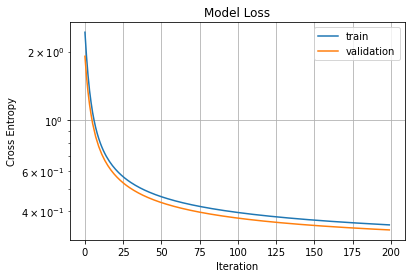

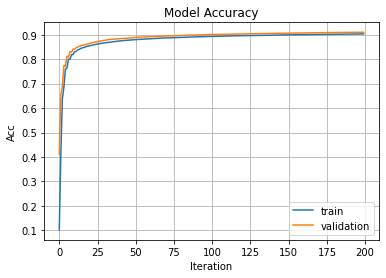

In [6]:

plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.title('Model Loss')
plt.yscale('log')
plt.ylabel('Cross Entropy')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

#print("history",history.history)
plt.plot(history.history['sparse_categorical_accuracy'],label="train")
plt.plot(history.history['val_sparse_categorical_accuracy'],label="validation")
plt.title('Model Accuracy')
#plt.yscale('log')
plt.ylabel('Acc')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

# shows that the loss is reducing over iterations/epochs

## Inspect how well the system is working on a sample of 25 new images (from the test set)...
- The test set has a lot of images in it, but we can only view 25 at a time.
- Hence rerun this code block several times, to get a different random set of samples from the test set

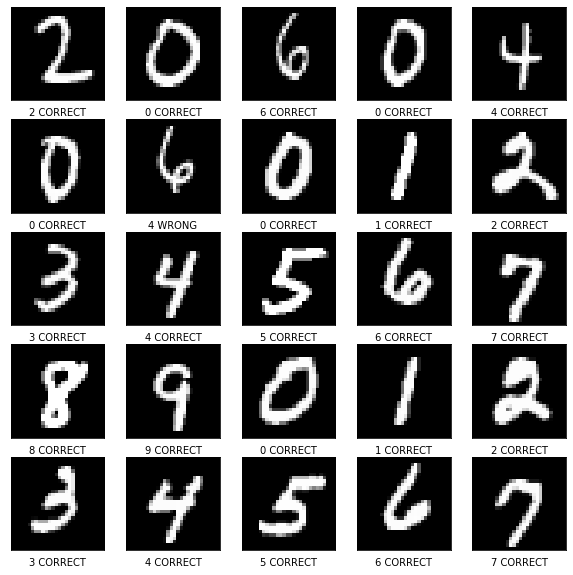

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))
# plot 25 random images from the test set.
first_index=np.random.randint(len(test_images)-25)
for i in range(first_index,first_index+25):
    # define subplot
    plt.subplot(5,5,i+1-first_index)
    # plot raw pixel data
    plt.imshow(test_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names!=None:
        prediction=keras_model(test_images[i:i+1])[0,:] # This will be a vector of length 10
        prediction_class=np.argmax(prediction)  # Pick the index of the largest element of the length-10 vector
        # Add a label underneath...
        true_label=test_labels0[i]
        class_name=class_names[prediction_class]
        plt.xlabel(class_name+" "+("CORRECT" if prediction_class==true_label else "WRONG"))
plt.show()

## Does adding a hidden layer produce better performance on the MNIST dataset?

In [8]:
from tensorflow import keras
# Each MNIST images are 28*28.  Therefore if there are N images, then the 
# shape of the numpy array holding the images is N*28*28
# We will reshape that here to be N*784, using a numpy reshape.
# Note that this flattens each image into a single vector length 784.
test_images=test_images0.reshape(10000,784) # 10000 test patterns
train_images=train_images0.reshape(60000,784) # 60000 train patterns

# Also rescale greyscale from 8 bit to floating point (by dividing by 255)
test_images=test_images/255.0
train_images=train_images/255.0 

# Create the model
layer0=keras.layers.Dense(10, activation="relu") # adding a hidden layer
layer1=keras.layers.Dense(10, activation="softmax")
keras_model=keras.models.Sequential([layer0,layer1])
keras_model.build(input_shape=[None,784])

In [9]:
# View the model summary information...
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [10]:
optimizer = tf.keras.optimizers.SGD(0.5)
keras_model.compile(
    optimizer=optimizer,  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
) 
# Train loop
history = keras_model.fit(
    train_images,
    train_labels0,
    batch_size=len(train_images),
    epochs=200, # iterations
    validation_data=(test_images, test_labels0),
)


Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2.3752 - sparse_categorical_accuracy: 0.1283 - val_loss: 2.2333 - val_sparse_categorical_accuracy: 0.2078
Epoch 2/200
1/1 [==============================] - 0s 112ms/step - loss: 2.2266 - sparse_categorical_accuracy: 0.2150 - val_loss: 2.1269 - val_sparse_categorical_accuracy: 0.2075
Epoch 3/200
1/1 [==============================] - 0s 120ms/step - loss: 2.1157 - sparse_categorical_accuracy: 0.2116 - val_loss: 2.0486 - val_sparse_categorical_accuracy: 0.2351
Epoch 4/200
1/1 [==============================] - 0s 118ms/step - loss: 2.0352 - sparse_categorical_accuracy: 0.2467 - val_loss: 2.0684 - val_sparse_categorical_accuracy: 0.2689
Epoch 5/200
1/1 [==============================] - 0s 119ms/step - loss: 2.0591 - sparse_categorical_accuracy: 0.2683 - val_loss: 2.2495 - val_sparse_categorical_accuracy: 0.3043
Epoch 6/200
1/1 [==============================] - 0s 115ms/step - loss: 2.2273 - sparse_categorical_accurac

1/1 [==============================] - 0s 114ms/step - loss: 0.6175 - sparse_categorical_accuracy: 0.7853 - val_loss: 0.5940 - val_sparse_categorical_accuracy: 0.8006
Epoch 47/200
1/1 [==============================] - 0s 140ms/step - loss: 0.6055 - sparse_categorical_accuracy: 0.7956 - val_loss: 0.6023 - val_sparse_categorical_accuracy: 0.7933
Epoch 48/200
1/1 [==============================] - 0s 159ms/step - loss: 0.6133 - sparse_categorical_accuracy: 0.7886 - val_loss: 0.5768 - val_sparse_categorical_accuracy: 0.8087
Epoch 49/200
1/1 [==============================] - 0s 158ms/step - loss: 0.5885 - sparse_categorical_accuracy: 0.8047 - val_loss: 0.5766 - val_sparse_categorical_accuracy: 0.8070
Epoch 50/200
1/1 [==============================] - 0s 152ms/step - loss: 0.5882 - sparse_categorical_accuracy: 0.8018 - val_loss: 0.5480 - val_sparse_categorical_accuracy: 0.8259
Epoch 51/200
1/1 [==============================] - 0s 150ms/step - loss: 0.5600 - sparse_categorical_accuracy: 0

1/1 [==============================] - 0s 137ms/step - loss: 0.3793 - sparse_categorical_accuracy: 0.8928 - val_loss: 0.3651 - val_sparse_categorical_accuracy: 0.8937
Epoch 92/200
1/1 [==============================] - 0s 146ms/step - loss: 0.3778 - sparse_categorical_accuracy: 0.8922 - val_loss: 0.3652 - val_sparse_categorical_accuracy: 0.8951
Epoch 93/200
1/1 [==============================] - 0s 147ms/step - loss: 0.3764 - sparse_categorical_accuracy: 0.8936 - val_loss: 0.3625 - val_sparse_categorical_accuracy: 0.8944
Epoch 94/200
1/1 [==============================] - 0s 136ms/step - loss: 0.3750 - sparse_categorical_accuracy: 0.8928 - val_loss: 0.3628 - val_sparse_categorical_accuracy: 0.8962
Epoch 95/200
1/1 [==============================] - 0s 143ms/step - loss: 0.3738 - sparse_categorical_accuracy: 0.8942 - val_loss: 0.3600 - val_sparse_categorical_accuracy: 0.8949
Epoch 96/200
1/1 [==============================] - 0s 145ms/step - loss: 0.3725 - sparse_categorical_accuracy: 0

1/1 [==============================] - 0s 129ms/step - loss: 0.3343 - sparse_categorical_accuracy: 0.9033 - val_loss: 0.3253 - val_sparse_categorical_accuracy: 0.9030
Epoch 137/200
1/1 [==============================] - 0s 129ms/step - loss: 0.3334 - sparse_categorical_accuracy: 0.9046 - val_loss: 0.3232 - val_sparse_categorical_accuracy: 0.9032
Epoch 138/200
1/1 [==============================] - 0s 141ms/step - loss: 0.3326 - sparse_categorical_accuracy: 0.9041 - val_loss: 0.3237 - val_sparse_categorical_accuracy: 0.9039
Epoch 139/200
1/1 [==============================] - 0s 130ms/step - loss: 0.3318 - sparse_categorical_accuracy: 0.9051 - val_loss: 0.3218 - val_sparse_categorical_accuracy: 0.9038
Epoch 140/200
1/1 [==============================] - 0s 154ms/step - loss: 0.3310 - sparse_categorical_accuracy: 0.9045 - val_loss: 0.3222 - val_sparse_categorical_accuracy: 0.9041
Epoch 141/200
1/1 [==============================] - 0s 141ms/step - loss: 0.3303 - sparse_categorical_accura

1/1 [==============================] - 0s 141ms/step - loss: 0.3094 - sparse_categorical_accuracy: 0.9110 - val_loss: 0.3026 - val_sparse_categorical_accuracy: 0.9117
Epoch 182/200
1/1 [==============================] - 0s 150ms/step - loss: 0.3090 - sparse_categorical_accuracy: 0.9109 - val_loss: 0.3025 - val_sparse_categorical_accuracy: 0.9118
Epoch 183/200
1/1 [==============================] - 0s 146ms/step - loss: 0.3086 - sparse_categorical_accuracy: 0.9111 - val_loss: 0.3019 - val_sparse_categorical_accuracy: 0.9123
Epoch 184/200
1/1 [==============================] - 0s 137ms/step - loss: 0.3082 - sparse_categorical_accuracy: 0.9112 - val_loss: 0.3018 - val_sparse_categorical_accuracy: 0.9121
Epoch 185/200
1/1 [==============================] - 0s 111ms/step - loss: 0.3078 - sparse_categorical_accuracy: 0.9113 - val_loss: 0.3012 - val_sparse_categorical_accuracy: 0.9129
Epoch 186/200
1/1 [==============================] - 0s 115ms/step - loss: 0.3075 - sparse_categorical_accura

In [11]:
# first show keys for data series recorded by fit loop:
for item in history.history:
    print("Key:",item)

Key: loss
Key: sparse_categorical_accuracy
Key: val_loss
Key: val_sparse_categorical_accuracy


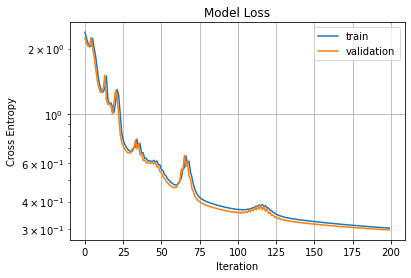

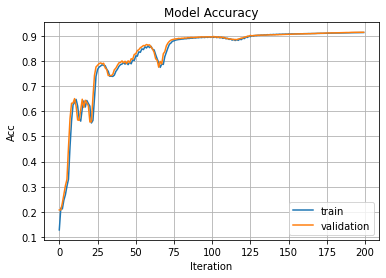

In [12]:

plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.title('Model Loss')
plt.yscale('log')
plt.ylabel('Cross Entropy')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

#print("history",history.history)
plt.plot(history.history['sparse_categorical_accuracy'],label="train")
plt.plot(history.history['val_sparse_categorical_accuracy'],label="validation")
plt.title('Model Accuracy')
#plt.yscale('log')
plt.ylabel('Acc')
plt.xlabel('Iteration')
plt.grid()
plt.legend()
plt.show()

# shows that the loss is reducing over iterations/epochs

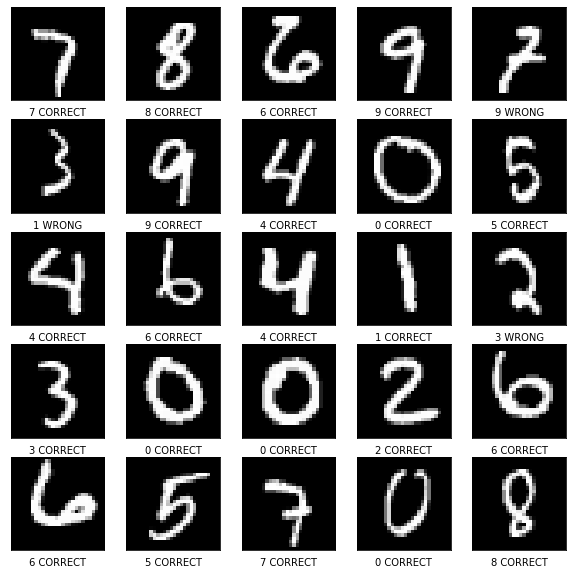

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))
# plot 25 random images from the test set.
first_index=np.random.randint(len(test_images)-25)
for i in range(first_index,first_index+25):
    # define subplot
    plt.subplot(5,5,i+1-first_index)
    # plot raw pixel data
    plt.imshow(test_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names!=None:
        prediction=keras_model(test_images[i:i+1])[0,:] # This will be a vector of length 10
        prediction_class=np.argmax(prediction)  # Pick the index of the largest element of the length-10 vector
        # Add a label underneath...
        true_label=test_labels0[i]
        class_name=class_names[prediction_class]
        plt.xlabel(class_name+" "+("CORRECT" if prediction_class==true_label else "WRONG"))
plt.show()